In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import sklearn.model_selection
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import os
import numpy as np
from os import listdir
import shutil

#tf.compat.v1.disable_eager_execution()

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 9s 0us/step


In [27]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [58]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
def plot_images_with_label(images_arr, y, start_ind=0, rows=5, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
    axes = axes.flatten()
    ind = 0
    for img, ax in zip( images_arr[start_ind:], axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(','.join(map(str, y[start_ind+ind])))
        ind +=1
    plt.tight_layout()
    plt.show()


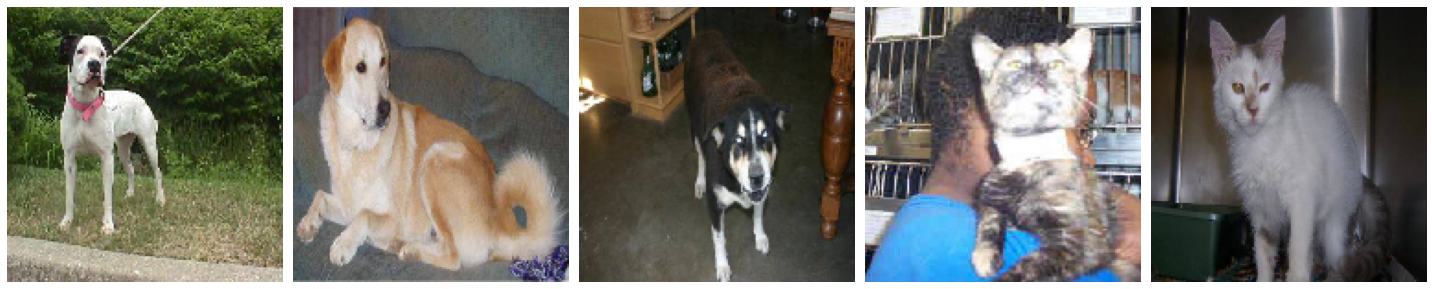

In [14]:
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [73]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 20736)            

In [72]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
15/15 [==============================] - 15s 997ms/step - loss: 0.6952 - accuracy: 0.5091 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 2/10
15/15 [==============================] - 14s 956ms/step - loss: 0.6931 - accuracy: 0.5118 - val_loss: 0.6931 - val_accuracy: 0.4920
Epoch 3/10
15/15 [==============================] - 15s 967ms/step - loss: 0.6931 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 4/10
15/15 [==============================] - 15s 989ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 5/10
15/15 [==============================] - 17s 1s/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5138
Epoch 6/10
15/15 [==============================] - 15s 1s/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6931 - val_accuracy: 0.4862
Epoch 7/10
15/15 [==============================] - 15s 993ms/step - loss: 0.6931 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch

2.0

In [67]:
val_data_gen.reset()
batch = val_data_gen.next()
with_res = list(zip(model.predict(batch[0]), batch[1]))


def res(x):
    if(x[1] == 1 and x[0][0] < 0.5):
        return 'False Cat'
    if(x[1] == 0 and x[0][0] >= 0.5):
        return 'False Dog'
    return 'Ok'
labeled_res =list(map(lambda x: [x[0][0], x[1], res(x)] , with_res))

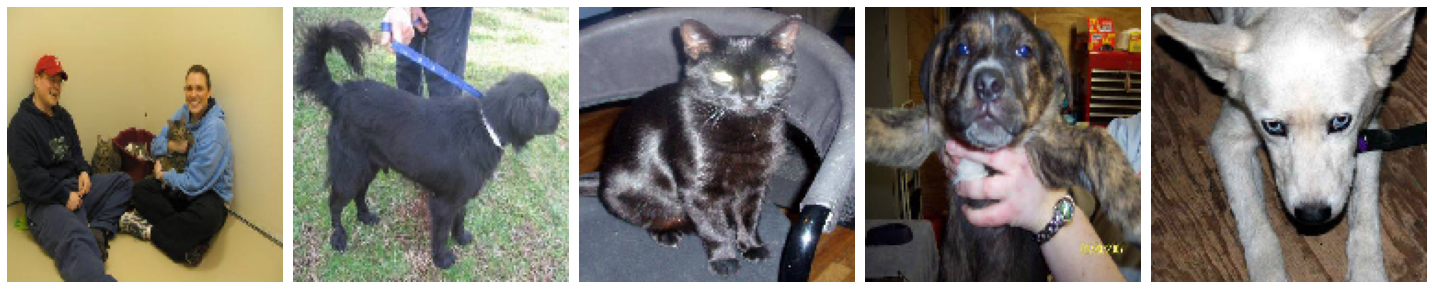

array([0., 1., 0., 1., 1.], dtype=float32)

In [68]:
plotImages(batch[0][:5])
batch[1][:5]

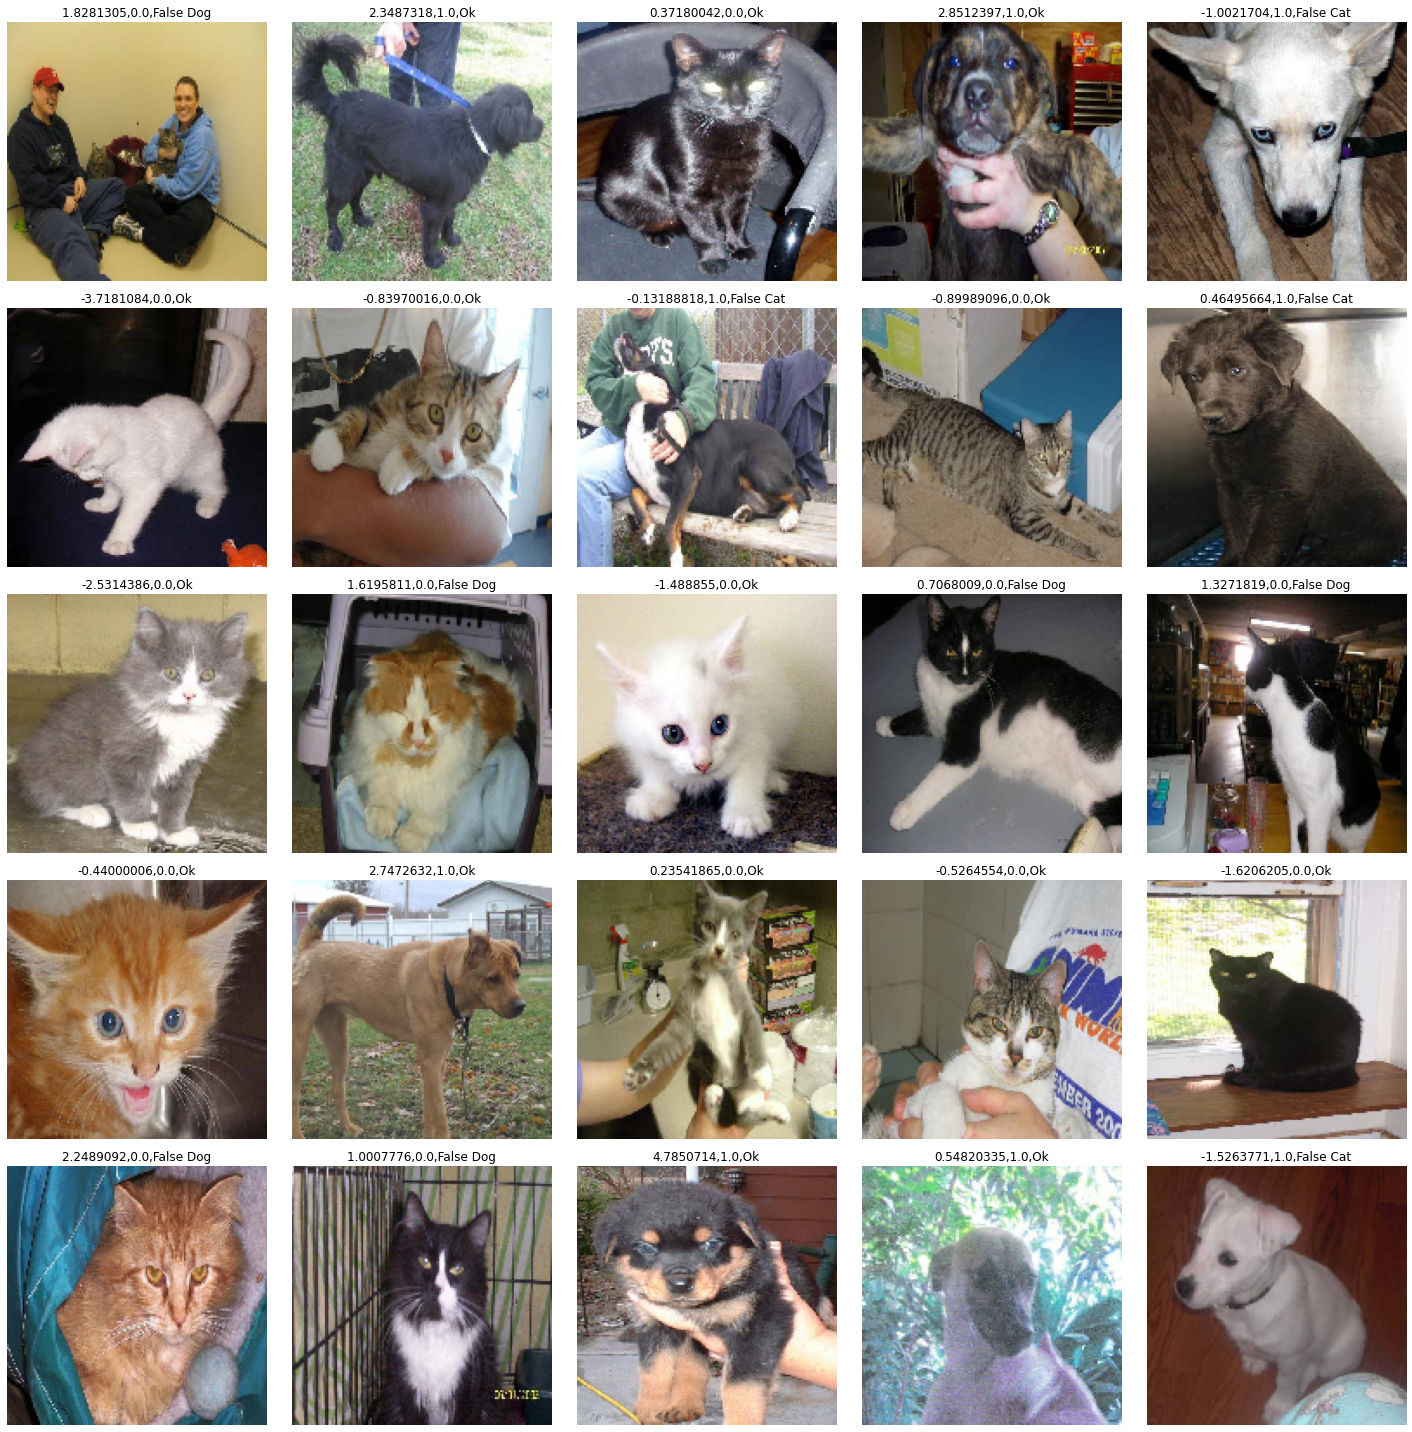

In [69]:
plot_images_with_label(batch[0], labeled_res)

In [70]:
labeled_res

[[1.8281305, 0.0, 'False Dog'],
 [2.3487318, 1.0, 'Ok'],
 [0.37180042, 0.0, 'Ok'],
 [2.8512397, 1.0, 'Ok'],
 [-1.0021704, 1.0, 'False Cat'],
 [-3.7181084, 0.0, 'Ok'],
 [-0.83970016, 0.0, 'Ok'],
 [-0.13188818, 1.0, 'False Cat'],
 [-0.89989096, 0.0, 'Ok'],
 [0.46495664, 1.0, 'False Cat'],
 [-2.5314386, 0.0, 'Ok'],
 [1.6195811, 0.0, 'False Dog'],
 [-1.488855, 0.0, 'Ok'],
 [0.7068009, 0.0, 'False Dog'],
 [1.3271819, 0.0, 'False Dog'],
 [-0.44000006, 0.0, 'Ok'],
 [2.7472632, 1.0, 'Ok'],
 [0.23541865, 0.0, 'Ok'],
 [-0.5264554, 0.0, 'Ok'],
 [-1.6206205, 0.0, 'Ok'],
 [2.2489092, 0.0, 'False Dog'],
 [1.0007776, 0.0, 'False Dog'],
 [4.7850714, 1.0, 'Ok'],
 [0.54820335, 1.0, 'Ok'],
 [-1.5263771, 1.0, 'False Cat'],
 [-0.038069874, 0.0, 'Ok'],
 [-0.008619515, 0.0, 'Ok'],
 [-5.155048, 0.0, 'Ok'],
 [-1.5975673, 0.0, 'Ok'],
 [4.457676, 1.0, 'Ok'],
 [0.30865788, 1.0, 'False Cat'],
 [0.42296836, 1.0, 'False Cat'],
 [-1.0078617, 1.0, 'False Cat'],
 [0.710761, 0.0, 'False Dog'],
 [0.42795974, 0.0, 'Ok'],
